___
## Ciência dos Dados - PROJETO 3 - INSPER

___
### Feito por: Theo Barbara, Abel Cavalcante, Gustavo Pierre e Victor Jurdi
___

# Wines Review

___

## A. INTRODUÇÃO

Para o Projeto 3 de Ciências dos Dados, o grupo escolheu trabalhar com vinhos. O nosso DataSet contém 10 variavéis(Pais de origem, descrição do vinho, designação, pontos na avaliação, preço, provincia, região, variedade e a adega produtora) e temos como objetivo procurar prever o preço do vinho através das variavéis mais qualificadas, que serão, o país, os pontos (nota do vinho) e o tipo da uva.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

### BASE DE DADOS

Em primeira instância, as bibliotecas foram importadas e os dadeos foram filtrados:

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from operator import itemgetter
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
x=pd.read_csv('winemag-data_first150k.csv')
del x["Unnamed: 0"]
x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Após isso, foi criado uma nova coluna com a frequência relativa dos tipos de uva. isso é feito pois, como há diversos vinhos extremamente raros, acabariam não fazendo tanta  relevância na nossa análise. Assim, os vinhos com frequência menor que 0.5% foram deletados do dataset.

In [3]:
dic = {}
dic2 = {}
lista = []
lista2=[]
i=0

for e in x.variety:
    if e not in dic:
        dic[e] = 1
    elif e in dic:
        dic[e] +=1

for e in dic:
    if dic[e] > 0:
        lista.append(dic[e]/len(dic))
        
for e in x.variety:
    if e not in dic2:
        dic2[e] = 1

for e in dic2:
    dic2[e] = lista[i]
    i+=1
    
for uva in x.variety:
    lista2.append(dic2[uva])
    
x["Frequencia"] = lista2
novo_x = x[x.Frequencia>0.5]

novo_x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,22.612342
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,22.612342


Por fim, criamos 

In [4]:
novo_x.loc[(novo_x.price<50),'Preço'] = 'Até 50'
novo_x.loc[(novo_x.price>50)&(novo_x.price<=200),'Preço'] = 'Até 200'
novo_x.loc[(novo_x.price>200)&(novo_x.price<=400),'Preço'] = 'Até 400'
novo_x.loc[(novo_x.price>400)&(novo_x.price<=600),'Preço'] = 'Até 600'
novo_x.loc[(novo_x.price>600)&(novo_x.price<=800),'Preço'] = 'Até 800'
novo_x.loc[(novo_x.price>800)&(novo_x.price<=1000),'Preço'] = 'Até 1000'
novo_x.loc[(novo_x.price>1000)&(novo_x.price<=1500),'Preço'] = 'Até 1500'
novo_x.loc[(novo_x.price>2000),'Preço'] = 'Mais que 2000'

novo_x.loc[(novo_x.points<=80),'Pontos'] = '80 pontos'
novo_x.loc[(novo_x.points>80)&(novo_x.points<=85),'Pontos'] = '81 - 85 pontos'
novo_x.loc[(novo_x.points>85)&(novo_x.points<=90),'Pontos'] = '86 - 90 pontos'
novo_x.loc[(novo_x.points>90)&(novo_x.points<=95),'Pontos'] = '91 - 95 pontos'
novo_x.loc[(novo_x.points>95)&(novo_x.points<=100),'Pontos'] = '95 - 100 pontos'

novo_x.head()

C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,description,designation,points,price,province,region_1,region_2,variety,winery,Frequencia,Preço,Pontos
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,20.253165,Até 400,95 - 100 pontos
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,10.000000,Até 200,95 - 100 pontos
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,22.612342,Até 200,95 - 100 pontos
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,22.612342,Até 200,91 - 95 pontos
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,22.612342,Até 200,91 - 95 pontos


### ANÁLISE DESCRITIVA

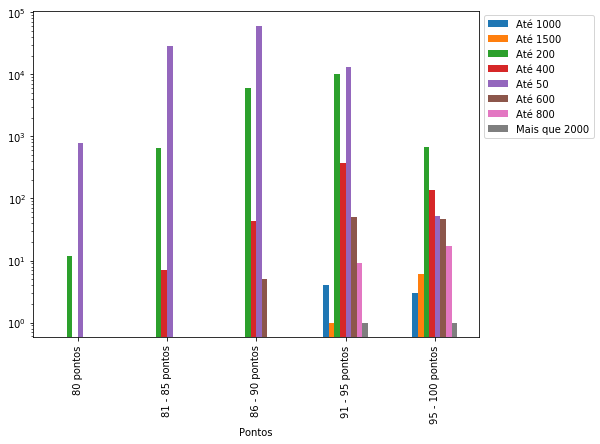

In [5]:
data = pd.crosstab(novo_x.Pontos, novo_x.Preço)
data.plot(kind='bar', figsize=(8,6));
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8));

In [6]:
novo_x.points.corr(novo_x.price)

0.4600421512441059

In [7]:
novo_x.Frequencia.corr(novo_x.price)

0.11149984361374775

In [8]:
novo_x.Frequencia.corr(novo_x.points)

0.06969229048694064

In [9]:
#plt.hist(novo_x["country"]);

In [10]:
#plt.hist(novo_x["Preço"]);

In [11]:
#plt.hist(novo_x.Pontos);

In [12]:
#plt.figure(figsize = (10, 10))
#sns.heatmap(novo_x.corr(), linewidth=0.5)
#plt.show()

In [13]:
dummy = pd.get_dummies(novo_x['variety'])
dummy.head()

,Aglianico,Albariño,Barbera,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Carmenère,Champagne Blend,Chardonnay,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
novo_x = pd.concat([novo_x,dummy],axis=1)
novo_x.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,...,Sauvignon Blanc,Shiraz,Sparkling Blend,Syrah,Tempranillo,Tempranillo Blend,Torrontés,Viognier,White Blend,Zinfandel
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,...,0,0,0,0,0,0,0,0,0,0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,...,1,0,0,0,0,0,0,0,0,0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,...,0,0,0,0,0,0,0,0,0,0
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,...,0,0,0,0,0,0,0,0,0,0
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,...,0,0,0,0,0,0,0,0,0,0


In [15]:
novo_x = novo_x.dropna(subset=['price'])
novo_x.shape

(124172, 66)

In [16]:
novo_x.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'Frequencia', 'Preço',
       'Pontos', 'Aglianico', 'Albariño', 'Barbera',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon', 'Carmenère', 'Champagne Blend',
       'Chardonnay', 'Chenin Blanc', 'Corvina, Rondinella, Molinara',
       'Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera',
       'Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot',
       'Montepulciano', 'Moscato', 'Nebbiolo', 'Nero d'Avola', 'Petite Sirah',
       'Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port',
       'Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend',
       'Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé',
       'Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz',
       'Sparkling Blend', 'Syrah', 'Tempranillo', 'Temp

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [17]:
seed = 569

X_train, X_test, y_train, y_test = train_test_split(novo_x, novo_x.price, random_state = seed)

X_train

media_price = np.mean(X_train.price)
print('A média dos preços dos vinhos é de R$ {0}'.format(media_price))

media_points = np.mean(X_train.points)
print('A média das notas dos vinhos é de {0} pontos'.format(media_points))

A média dos preços dos vinhos é de R$ 33.77181114368242
A média das notas dos vinhos é de 87.82603700243747 pontos


o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [18]:
novo_x2 = novo_x[['points', 'Aglianico', 'Albariño', 'Barbera',
       'Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon', 'Carmenère', 'Champagne Blend',
       'Chardonnay', 'Chenin Blanc', 'Corvina, Rondinella, Molinara',
       'Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera',
       'Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot',
       'Montepulciano', 'Moscato', 'Nebbiolo', "Nero d'Avola", 'Petite Sirah',
       'Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port',
       'Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend',
       'Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé',
       'Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz',
       'Sparkling Blend', 'Syrah', 'Tempranillo', 'Tempranillo Blend',
       'Torrontés', 'Viognier', 'White Blend', 'Zinfandel']]
y = novo_x[['price']]

X_train, X_test, y_train, y_test = train_test_split(novo_x2, y, random_state = seed)

In [19]:
erro = []
for k in range(1,5):
    clf = KNeighborsRegressor(k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    erro.append(mean_squared_error(y_test,y_pred))
    

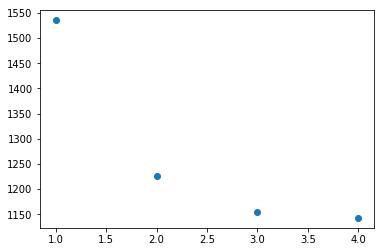

In [22]:
lista = [1,2,3,4]
plt.scatter(lista, erro)

In [25]:
clf = KNeighborsRegressor(3)
clf.fit(X_train, y_train)
print(mean_squared_error(y_test,y_pred))

print('Com K = 3, temos uma estabilização da medida de erro')

1142.7641396611152
Com K = 3, temos uma estabilização da medida de erro


o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [ ]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [ ]:
novo_x.columns

In [ ]:
X = novo_x[['points','Aglianico','Albariño','Barbera','Bordeaux-style Red Blend','Bordeaux-style White Blend','Cabernet Franc','Cabernet Sauvignon','Carmenère','Champagne Blend','Chardonnay','Chenin Blanc','Corvina, Rondinella, Molinara','Dolcetto', 'Gamay', 'Garganega', 'Garnacha', 'Gewürztraminer', 'Glera','Grenache', 'Grüner Veltliner', 'Malbec', 'Meritage', 'Merlot','Montepulciano', 'Moscato', 'Nebbiolo', "Nero d'Avola", 'Petite Sirah','Pinot Blanc', 'Pinot Grigio', 'Pinot Gris', 'Pinot Noir', 'Port','Portuguese Red', 'Portuguese White', 'Prosecco', 'Red Blend','Rhône-style Red Blend', 'Rhône-style White Blend', 'Riesling', 'Rosé','Sangiovese', 'Sangiovese Grosso', 'Sauvignon Blanc', 'Shiraz','Sparkling Blend', 'Syrah', 'Tempranillo', 'Tempranillo Blend','Torrontés', 'Viognier', 'White Blend', 'Zinfandel']]

In [ ]:
Y = novo_x['price']

In [ ]:
results3 = regress(X, Y)
results3.summary()

Como podemos analisar nos dados da regressão, o $P > |t|$ para as variáveis 'Bordeaux-style White Blend' , 'Meritage' e 'Tempranillo Blend' não são tão baixas, o que não nos permite rejeitar a hipótese nula, portanto seus betas são zero. Já para a probabilidade das variáveis restantes, podemos afirmar que se rejeita a hipótese nula, portanto seus respectivos betas são maiores que zero, considerando que as suas probabilidades foram baixas ou nulas.

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS